In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Projects/Electric theft project/China_dataset/data.csv')

In [ ]:
print('The basic information on the dataset\n')
print(data.info())
print('----------------------------------------')
print('\nThe inforamtion of the dataset by each and every attributes\n')
print(data.info)
print('-------------------------------------------')
print('\ncheck the amount of the null values in the dataset\n')
print(data.isnull().values.sum())

## Process null dataset

In [ ]:
label_data = data['FLAG']
del data['FLAG']
del data['CONS_NO']
del label_data[1]

In [ ]:
data

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,0.73,1.68,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,13.46,19.56,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


In [ ]:
new_data = data.T
for cols in new_data.columns:
    a = new_data[cols].isnull().sum()
    if a>0:
        new_data[cols] = new_data[cols].fillna(new_data[cols].median())

print(new_data.isna().values.sum())
new_data = new_data.fillna(0)

5170


In [ ]:
new_data.T

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,9.770,9.770,9.770,9.770,9.770,9.770,9.770,9.770,9.770,9.770,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,8.900,8.900,8.900,8.900,8.900,8.900,8.900,8.900,8.900,8.900,...,8.90,8.90,8.90,8.90,8.90,8.90,8.90,8.90,8.90,8.90
3,12.735,12.735,12.735,12.735,12.735,12.735,12.735,12.735,12.735,12.735,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,2.900,3.420,3.810,4.580,3.560,4.250,3.860,3.530,3.410,0.850,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,4.260,4.260,4.260,4.260,4.260,4.260,4.260,4.260,4.260,4.260,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,2.700,4.390,3.950,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,0.580,0.840,1.610,0.900,0.600,0.820,0.890,0.030,0.730,1.680,...,0.75,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,16.890,13.840,13.500,14.600,14.460,12.340,15.370,17.010,13.460,19.560,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


In [ ]:
new_data.sort_index()
new_data.reset_index(inplace=True)
new_data['index'] = new_data['index'].astype('datetime64')
new_data.index =new_data['index']
del(new_data['index'])
del(new_data[1])
process_data = new_data.sort_index().T
print(process_data)

index  2014-01-01  2014-01-02  2014-01-03  2014-01-04  2014-01-05  2014-01-06  \
0           9.770       9.770       9.770       9.770       9.770       9.770   
2           8.900       8.900       8.900       8.900       8.900       8.900   
3          12.735      12.735      12.735      12.735      12.735      12.735   
4           2.900       5.640       6.990       3.320       3.610       5.350   
5           3.200       3.200       3.200       3.200       3.200       3.200   
...           ...         ...         ...         ...         ...         ...   
42367       4.260       4.260       4.260       4.260       4.260       4.260   
42368       2.700       0.000       0.000       5.720       6.050       5.810   
42369       0.580       1.160       0.920       0.980       1.540       1.380   
42370      16.890      15.150      19.280      17.190      16.800      17.480   
42371       8.090       8.090       8.090       8.090       8.090       8.090   

index  2014-01-07  2014-01-

In [ ]:
process_data

index,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,9.770,9.770,9.770,9.770,9.770,9.770,9.770,9.770,9.770,9.770,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
2,8.900,8.900,8.900,8.900,8.900,8.900,8.900,8.900,8.900,8.900,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,12.735,12.735,12.735,12.735,12.735,12.735,12.735,12.735,12.735,12.735,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,2.900,5.640,6.990,3.320,3.610,5.350,4.730,3.680,3.530,3.420,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
5,3.200,3.200,3.200,3.200,3.200,3.200,3.200,3.200,3.200,3.200,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,4.260,4.260,4.260,4.260,4.260,4.260,4.260,4.260,4.260,4.260,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
42368,2.700,0.000,0.000,5.720,6.050,5.810,3.070,4.040,5.680,4.390,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
42369,0.580,1.160,0.920,0.980,1.540,1.380,0.890,0.700,1.230,0.840,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
42370,16.890,15.150,19.280,17.190,16.800,17.480,17.860,23.990,12.340,13.840,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [ ]:
monthly_data = process_data.T.resample('M').sum()

In [ ]:
monthly_data

In [ ]:
%matplotlib
plt.bar(monthly_data.index, monthly_data[10000])

In [ ]:
analysis = process_data.T.describe()
nulls = []
for i in process_data.T:
  xx = analysis[i]
  if xx['max'] == 0:
    # print(i)
    nulls.append(i)

,0,2,3,4,5,6,7,8,9,10,...,42362,42363,42364,42365,42366,42367,42368,42369,42370,42371
index,,,,,,,,,,,,,,,,,,,,,
2014-01-01,9.77,8.90,12.735,2.90,3.20,0.11,0.91,6.60,11.02,0.345,...,9.525,148.40,0.00,5.22,1.21,4.26,2.70,0.58,16.89,8.09
2014-01-02,9.77,8.90,12.735,5.64,3.20,0.11,1.16,6.60,7.92,0.345,...,9.525,159.86,0.00,5.04,1.21,4.26,0.00,1.16,15.15,8.09
2014-01-03,9.77,8.90,12.735,6.99,3.20,0.25,0.75,6.60,8.41,0.345,...,9.525,157.20,0.00,4.92,1.21,4.26,0.00,0.92,19.28,8.09
2014-01-04,9.77,8.90,12.735,3.32,3.20,0.27,1.30,6.60,9.66,0.345,...,9.525,104.80,0.00,4.88,1.21,4.26,5.72,0.98,17.19,8.09
2014-01-05,9.77,8.90,12.735,3.61,3.20,0.21,0.74,6.60,9.86,0.345,...,9.525,118.17,0.00,13.59,1.21,4.26,6.05,1.54,16.80,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-27,8.75,19.09,20.790,6.73,0.42,1.18,3.82,3.14,57.22,0.000,...,11.850,236.22,2.50,6.78,0.82,2.83,4.64,0.51,11.15,7.96
2016-10-28,9.30,18.56,17.950,7.52,1.91,1.13,2.75,3.65,56.68,0.000,...,11.460,243.06,2.74,7.83,0.65,2.54,3.71,0.79,12.22,8.13
2016-10-29,7.54,16.25,19.260,10.89,0.42,1.34,2.96,3.70,45.28,0.000,...,8.980,114.47,4.55,14.42,0.53,3.40,6.22,0.66,13.16,11.50


In [ ]:
len(nulls)

2113

In [ ]:
nulls_removel = process_data.T
labs = label_data
for i in nulls:
  del nulls_removel[i]
  del labs[i]
  # print(i)

In [ ]:
nulls_removel

,0,2,3,4,5,6,7,8,9,10,...,42362,42363,42364,42365,42366,42367,42368,42369,42370,42371
index,,,,,,,,,,,,,,,,,,,,,
2014-01-01,9.77,8.90,12.735,2.90,3.20,0.11,0.91,6.60,11.02,0.345,...,9.525,148.40,0.00,5.22,1.21,4.26,2.70,0.58,16.89,8.09
2014-01-02,9.77,8.90,12.735,5.64,3.20,0.11,1.16,6.60,7.92,0.345,...,9.525,159.86,0.00,5.04,1.21,4.26,0.00,1.16,15.15,8.09
2014-01-03,9.77,8.90,12.735,6.99,3.20,0.25,0.75,6.60,8.41,0.345,...,9.525,157.20,0.00,4.92,1.21,4.26,0.00,0.92,19.28,8.09
2014-01-04,9.77,8.90,12.735,3.32,3.20,0.27,1.30,6.60,9.66,0.345,...,9.525,104.80,0.00,4.88,1.21,4.26,5.72,0.98,17.19,8.09
2014-01-05,9.77,8.90,12.735,3.61,3.20,0.21,0.74,6.60,9.86,0.345,...,9.525,118.17,0.00,13.59,1.21,4.26,6.05,1.54,16.80,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-27,8.75,19.09,20.790,6.73,0.42,1.18,3.82,3.14,57.22,0.000,...,11.850,236.22,2.50,6.78,0.82,2.83,4.64,0.51,11.15,7.96
2016-10-28,9.30,18.56,17.950,7.52,1.91,1.13,2.75,3.65,56.68,0.000,...,11.460,243.06,2.74,7.83,0.65,2.54,3.71,0.79,12.22,8.13
2016-10-29,7.54,16.25,19.260,10.89,0.42,1.34,2.96,3.70,45.28,0.000,...,8.980,114.47,4.55,14.42,0.53,3.40,6.22,0.66,13.16,11.50


In [ ]:
len(labs)

40258

# Combine the dataset of fradu and honest consumer and analysed thier patterns

In [ ]:
honest_consumer=[]
fraud_consumer=[]
for i in nulls_removel:
    if label_data[i] == 1:
        fraud_consumer.append(nulls_removel[i])
    else:
        honest_consumer.append(nulls_removel[i])
        
fraud_df = pd.concat(fraud_consumer, axis=1)
honest_df = pd.concat(honest_consumer, axis=1)

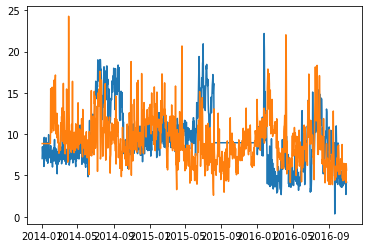

In [ ]:
plt.plot(fraud_df[90])
plt.plot(honest_df[7659])

In [ ]:
combo_data_fraud = fraud_df.T.describe()
combo_data_honest = honest_df.T.describe()

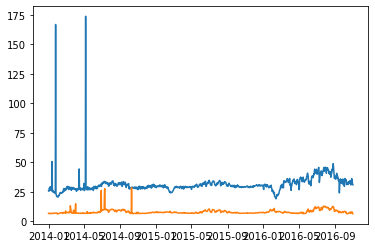

In [ ]:
plt.plot(combo_data_fraud.T['mean'])
plt.plot(combo_data_honest.T['mean'])

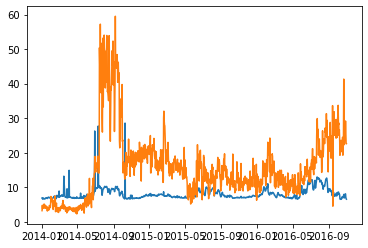

In [ ]:
plt.plot(combo_data_honest.T['mean'])
plt.plot(fraud_df[758])

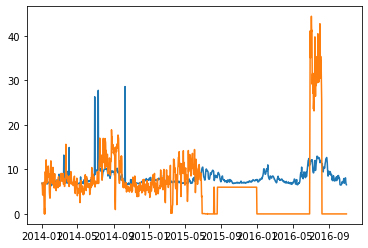

In [ ]:
plt.plot(combo_data_honest.T['mean'])
plt.plot(honest_df[37679])

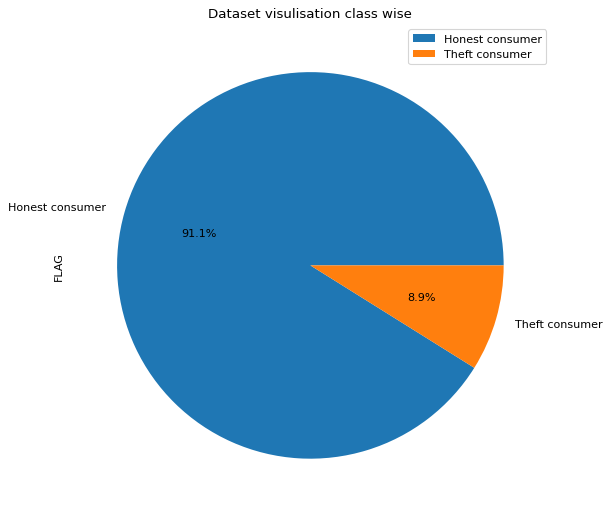

In [ ]:
#Data visulisation of samples in each class
plt.figure(figsize=(8,8),dpi=80,)
plt.title('Dataset visulisation class wise')
label = ['Honest consumer', 'Theft consumer']
zz=label_data.value_counts().plot(kind='pie',labels =label, autopct = '%1.1f%%')
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.grid(which='major',color='y', linestyle='--')
plt.legend()
plt.show()

# Data pre-prossesing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #Load the traning and testing data splitting data framwork
scaler= StandardScaler()
energy_array = np.array(nulls_removel.T)

In [ ]:
scaled_data = scaler.fit_transform(energy_array.T)
scaled_data=scaled_data.T

In [ ]:
scaled_data.shape

(40258, 1034)

In [ ]:
labs.shape

(40258,)

In [ ]:
labs.value_counts()

0    36679
1     3579
Name: FLAG, dtype: int64

In [ ]:
random_state = np.random.RandomState(32)
x_train,x_test, y_train, y_test = train_test_split(scaled_data,labs, test_size=0.30, random_state=random_state)

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.2), random_state=random_state)
model.fit(process_data,label_data)
print(model.get_params())

In [ ]:
y_pred = model.predict(process_data)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score #Load the classification report and confustion matrix for model accracy measurements

In [ ]:
print(classification_report(label_data,y_pred))

In [ ]:
y_train.value_counts()

0    27171
1     2488
Name: FLAG, dtype: int64

In [ ]:
import numpy as np
import math

# labels_dict : {ind_label: count_label}
# mu : parameter to tune 

def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(list(labels_dict.values()))
    # print(total)
    keys = labels_dict.keys()
    # print(keys)
    class_weight = dict()
    
    for key in keys:
        score = math.log(mu*total/float(labels_dict[key]))
        class_weight[key] = score 
        
    # print(class_weight)
    return class_weight

# random labels_dict
labels_dict = {0: 38757, 1: 3614}
# labels_dict = {0: 2813, 1: 78, 2: 2814, 3: 78, 4: 7914, 5: 248, 6: 7914, 7: 248}

create_class_weight(labels_dict)

{0: -1.8079672035672918, 1: 0.5645289889089454}

In [ ]:
from xgboost import XGBClassifier
model_xg = XGBClassifier(scale_pos_weight = 11.1532)
model_xg.fit(x_train, y_train)

In [ ]:
y_pred_xg = model_xg.predict(x_test)
print(classification_report(y_test,y_pred_xg))

# Apply the Deep learning models

In [ ]:
# x_train = x_train.reshape(-1,1034,1)
# x_test = x_test.reshape(-1,1034,1)

In [ ]:
import tensorflow as tf
import keras
from keras import layers, models
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, Flatten, Dropout

In [ ]:
#CNN model
CNNS_model= models.Sequential()
CNNS_model.add(Conv1D(filters=32, kernel_size=4, 
                     activation='relu',
                     input_shape=(x_train.shape[1],1)))
CNNS_model.add(Conv1D(filters = 48, kernel_size=4,
                     activation='relu'))
CNNS_model.add(MaxPooling1D(pool_size=2))
CNNS_model.add(Conv1D(16, kernel_size=1, 
                      activation='relu'))
CNNS_model.add(Conv1D(16, kernel_size=1,
                     activation='relu'))
CNNS_model.add(Dropout(0.15))
CNNS_model.add(Flatten())
CNNS_model.add(Dense(32, activation='relu'))
CNNS_model.add(Dense(2))

CNNS_model.compile(optimizer='adam', 
                   loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=["accuracy"])
CNNS_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1031, 32)          160       
                                                                 
 conv1d_1 (Conv1D)           (None, 1028, 48)          6192      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 514, 48)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 514, 16)           784       
                                                                 
 conv1d_3 (Conv1D)           (None, 514, 16)           272       
                                                                 
 dropout (Dropout)           (None, 514, 16)           0         
                                                        

In [ ]:
CNNS_model.fit(x_train,y_train, batch_size=32, 
          epochs=10, verbose=1, 
          validation_data=(x_train,y_train), )

Epoch 1/10
881/881 [==============================] - 91s 103ms/step - loss: 0.2765 - accuracy: 0.9115 - val_loss: 0.2504 - val_accuracy: 0.9123
Epoch 2/10
881/881 [==============================] - 89s 101ms/step - loss: 0.2540 - accuracy: 0.9123 - val_loss: 0.2358 - val_accuracy: 0.9123
Epoch 3/10
881/881 [==============================] - 91s 104ms/step - loss: 0.2355 - accuracy: 0.9123 - val_loss: 0.2186 - val_accuracy: 0.9123
Epoch 4/10
881/881 [==============================] - 90s 102ms/step - loss: 0.2184 - accuracy: 0.9204 - val_loss: 0.1882 - val_accuracy: 0.9215
Epoch 5/10
881/881 [==============================] - 89s 101ms/step - loss: 0.2010 - accuracy: 0.9253 - val_loss: 0.1694 - val_accuracy: 0.9375
Epoch 6/10
881/881 [==============================] - 92s 105ms/step - loss: 0.1823 - accuracy: 0.9311 - val_loss: 0.1508 - val_accuracy: 0.9388
Epoch 7/10
881/881 [==============================] - 91s 103ms/step - loss: 0.1634 - accuracy: 0.9384 - val_loss: 0.1352 - val_ac

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

ypred = np.argmax(CNNS_model(x_train), axis=1)
print(classification_report(y_train,ypred))

Tn,Fp, Fn, Tp = confusion_matrix(y_train, ypred).ravel()
print('\n True negative:',Tn,
     '\n False Negative:',Fn,
     '\n True Postive:', Tp,
     '\n False Positive:',Fp)
print('miss classification rate:',((Fp+Fn)/len(ypred))*100)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model 

In [ ]:
CNNS_model.save('cnn_sstructre_extractors.model')

INFO:tensorflow:Assets written to: cnn_sstructre_extractors.model/assets


In [ ]:
prepred_model_weights = Model(inputs=CNNS_model.input, outputs = CNNS_model.get_layer('dense').output)
prepred_model_weights.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_input (InputLayer)   [(None, 1034, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1031, 32)          160       
                                                                 
 conv1d_1 (Conv1D)           (None, 1028, 48)          6192      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 514, 48)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 514, 16)           784       
                                                                 
 conv1d_3 (Conv1D)           (None, 514, 16)           272       
                                                             

In [ ]:
#Parse the feature dataset from the graphs
Feature = prepred_model_weights.predict(x_train)
print(Feature.shape)
labels = y_train
print(labels.shape)



(28180, 32)
(28180,)


In [ ]:
from xgboost import XGBClassifier
model_xg = XGBClassifier(scale_pos_weight = 9.5132)
model_xg.fit(Feature, y_train)

XGBClassifier(scale_pos_weight=9.5132)

In [ ]:
y_preds_xg = model_xg.predict(prepred_model_weights.predict(x_train))
print(classification_report(y_train,y_preds_xg))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     25710
           1       0.73      0.97      0.83      2470

    accuracy                           0.97     28180
   macro avg       0.86      0.97      0.91     28180
weighted avg       0.97      0.97      0.97     28180



In [ ]:
Tn,Fp, Fn, Tp = confusion_matrix(y_test, y_preds_xg).ravel()
print('\n True negative:',Tn,
     '\n False Negative:',Fn,
     '\n True Postive:', Tp,
     '\n False Positive:',Fp)
print('miss classification rate:',((Fp+Fn)/len(y_preds_xg))*100)


 True negative: 9951 
 False Negative: 608 
 True Postive: 501 
 False Positive: 1018
miss classification rate: 13.462493790362643
